In [1]:
from scipy import misc
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
import random
import matplotlib.pyplot as plt
import matplotlib as mp
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
import logging
logging.basicConfig(level=20)

In [3]:
import cifar10

In [5]:
Train, LTrain, Test, LTest = cifar10.load_data()

In [36]:
import importlib
importlib.reload(cifar10)

net = cifar10.train_net(Train, LTrain, Test, LTest, lr=0.05, momentum=0.9)

[1,    20] loss: 2.277
train_accuracy:0.240
test_accuracy:0.188
[1,    40] loss: 2.137
train_accuracy:0.220
test_accuracy:0.242
[1,    60] loss: 2.022
train_accuracy:0.330
test_accuracy:0.304
[1,    80] loss: 1.931
train_accuracy:0.440
test_accuracy:0.336
[1,   100] loss: 1.831
train_accuracy:0.510
test_accuracy:0.358
[2,    20] loss: 1.748
train_accuracy:0.530
test_accuracy:0.371
[2,    40] loss: 1.745
train_accuracy:0.450
test_accuracy:0.401
[2,    60] loss: 1.659
train_accuracy:0.350
test_accuracy:0.403
[2,    80] loss: 1.730
train_accuracy:0.390
test_accuracy:0.355
[2,   100] loss: 1.719
train_accuracy:0.490
test_accuracy:0.379
[3,    20] loss: 1.615
train_accuracy:0.500
test_accuracy:0.416
[3,    40] loss: 1.580
train_accuracy:0.430
test_accuracy:0.385
[3,    60] loss: 1.567
train_accuracy:0.530
test_accuracy:0.415
[3,    80] loss: 1.435
train_accuracy:0.620
test_accuracy:0.441
[3,   100] loss: 1.441
train_accuracy:0.520
test_accuracy:0.455
[4,    20] loss: 1.426
train_accuracy:0.

In [11]:
    ntrain = 1000 # per class
    ntest = 100 # per class
    nclass = 10 # number of classes
    imsize = 28
    nchannels = 1 
    batchsize = 100
    nsamples = ntrain * nclass

    net = cifar10.LeNet()
    net.cuda()


LeNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (act): ReLU()
)

In [12]:
perm = np.arange(nsamples)
np.random.shuffle(perm)

In [14]:
batch_xs = torch.tensor(np.zeros((batchsize, nchannels, imsize, imsize)), device='cuda', dtype=torch.float32)#setup as [batchsize, width, height, numberOfChannels] and use np.zeros()
batch_ys = torch.tensor(np.zeros(batchsize), device='cuda', dtype=torch.long)#setup as [batchsize, the how many classes] 

for j in range(batchsize):
    batch_xs[j,:,:,:] = torch.tensor(Train[perm[j],:,:,:])
    batch_ys[j] = LTrain[perm[j]]

In [16]:
ys = net(batch_xs)

In [17]:
ys.shape

torch.Size([100, 10])

In [23]:
batch_ys

tensor([9, 4, 5, 9, 5, 2, 0, 7, 5, 5, 0, 0, 8, 6, 7, 7, 0, 8, 7, 8, 9, 1, 8, 3,
        5, 0, 9, 5, 6, 1, 2, 1, 1, 7, 0, 6, 4, 2, 0, 3, 1, 7, 0, 1, 2, 7, 0, 9,
        4, 2, 6, 0, 5, 5, 7, 8, 8, 1, 6, 4, 0, 5, 1, 5, 9, 1, 6, 4, 4, 1, 2, 4,
        7, 2, 5, 6, 4, 1, 5, 1, 0, 7, 5, 6, 2, 0, 5, 9, 9, 9, 3, 7, 2, 2, 0, 4,
        4, 0, 3, 3], device='cuda:0')

In [27]:
(ys.argmax(1) == batch_ys).float().mean()

tensor(0.1100, device='cuda:0')

In [ ]:
%debug

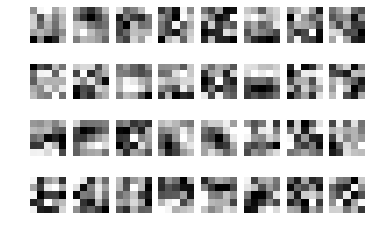

In [7]:
fig, axes = plt.subplots(4,8)
for (weight,axe) in zip(net.conv1.weight, axes.ravel()):
    axe.axis('off')
    axe.imshow(weight.detach().squeeze().cpu().numpy(), cmap='gray')